# Taylor Series: Integration and ODEs
## Lecture 11

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Integration

Assume we have  a function $f_i = f(x_i)$ which can be evaluated at the points $x_i$ for $ i = 0 \dots n$ where 

$$\Delta x = (b-a)/n$$

and

$$x_i=a + i \Delta x.$$

Rectangle rule:

$$ \int_a^b f(x) dx \approx  \sum_{i=0}^{n-1} f(x_i)\Delta x $$

Trapezoid rule:

$$\int_a^b f(x) dx \approx \Delta x \left (\frac{1}{2} f(x_0) + \frac{1}{2} f(x_{n})+ \sum_{i=1}^{n-1} f(x_i) \right) $$

Notice that we have $n$ rectangles or trapezoids but $n+1$ points in total.

## Comparing rectangle rule and trapezoid rule

The goal of this section is to compare visually the error associated with the rectangle and the trapezoidal rule as a function of the number of elements (rectangles or trapezoids) used. This will require some coding.  

The integral to evaluate is

$$\int_a^b f(x) dx $$

where


$$ f(x)= \sin(x) + x^3, \quad a=0, \quad  b =5 $$

##### Exercise to be done as a class.

#### 1. Define $f(x)$ as Python function.

In [3]:
def f(x):
    return np.sin(x) + x**3

#### 2. Plot this function between  x=-10 and x=10.

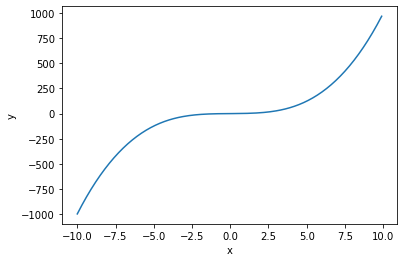

In [6]:
x = np.arange(-10, 10, 0.1)
y = f(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### 3. Calculate the exact value of the integral above (with a=0 and b=5)

$$\int_0^5 \sin(x) + x^3 dx$$

$$\int \sin(x) + x^3 dx = -\cos(x) + \frac{1}{4}x^4$$

In [11]:
exact = (-np.cos(5) + 1/4 * 5**4) - (-np.cos(0) + 1/4 * 0**4)
print(exact)

156.9663378145368


#### 4. Evaluate numerically the integral using the rectangle rule with 10 rectangles. 

$$ \int_a^b f(x) dx \approx  \sum_{i=0}^{n-1} f(x_i)\Delta x $$

In [50]:
a = 0
b = 5

def compute_rect(n):
    dx = (b-a)/n

    sum = 0
    for i in range(n):
        x_i = a + i*dx
        f_i = f(x_i)
        sum += f_i * dx
        
    return sum

rect = compute_rect(100)
print(rect)

153.88078667814008


#### 5. Evaluate numerically the integral using the trapezoid rule with 10 trapezoids.


$$\int_a^b f(x) dx \approx \Delta x \left (\frac{1}{2} f(x_0) + \frac{1}{2} f(x_{n})+ \sum_{i=1}^{n-1} f(x_i) \right) $$

In [29]:
a = 0
b = 5

def compute_trap(n):
    dx = (b-a)/n

    x_0 = a + 0*dx # a
    x_n = a + n*dx # b
    sum = f(x_0)/2 + f(x_n)/2

    for i in range(1, n):
        x_i = a + i*dx
        f_i = f(x_i)
        sum += f_i

    sum = sum * dx
    
    return sum

trap = compute_trap(10)
print(trap)

158.5138515555057


#### 6. Briefly comment on the answers you obtained in 4. and 5. 

 For the same number of $n$, the trapezoid rule gives a much closer result than the rectangular rule.

#### 7. The absolute relative error of the numerical integration can be calculated as follow: 

$\Delta$ =|Numerical Solution - Exact Solution|/|Exact Solution|

Code this expression for the relative error and calculate $\Delta$ for the results obtained in 4. and 5. above.

In [30]:
error_rect = abs(rect - exact)/exact
print('Error in rect {}'.format(error_rect))
error_trap = abs(trap - exact)/exact
print('Error in trap {}'.format(error_trap))

Error in rect 0.1877011058586136
Error in trap 0.009858889253040898


#### 8. Redo the same as in 7. but this time calculate the error when using 100 rectangles or trapezoids to evaluate the integral.

In [31]:
rect = compute_rect(100)
trap = compute_trap(100)
error_rect = abs(rect - exact)/exact
print('Error in rect {}'.format(error_rect))
error_trap = abs(trap - exact)/exact
print('Error in trap {}'.format(error_trap))

Error in rect 0.01965740667303093
Error in trap 9.859283813471921e-05


#### 9. It should be clear from your previous calculations that the error reduces significantly by increasing the number of elements and that the trapezoid rule is always more accurate than the rectangle rule.  

What would be illuminating would be to plot the relative error for each algorithms (i.e. rectangle and trapezoid rules) as a function of the number $n$ of elements used to approximate numerically the integral. Before coding this you need to become a little more familiar with NumPy arrays.

First, use the `np.arange` function  to automatically create the array: [1,2,3,4,5,6,7,8,9,10]

In [51]:
L = np.arange(1, 11)
L

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Now, starting from this first array and multiplying, create the array: [2,4,6,8,10,12,14,16,18,20]

In [52]:
L*2

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

Instead, try and create the array [2,4,8,16,32,64,128,256,512,1024]

In [53]:
2**L

array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])

#### 10. Next, the challenge is to create a two arrays. One with containing the number $n$ of elements used in the numerical integration and in the second array the relative error $\Delta$ using rectangular rule.  

(This can be done with or without loops.)



In [59]:
num_elements = 2**L

Δrect = []
for n in num_elements:
    rect = compute_rect(n)
    error_rect = abs(rect - exact)/exact
    Δrect.append(error_rect)

Now you can plot the results of this analysis like this:

Text(0, 0.5, 'Error')

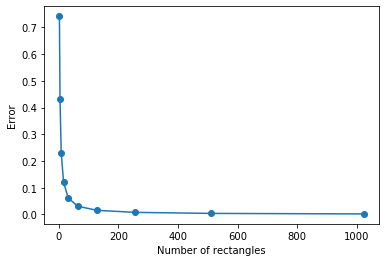

In [60]:
plt.plot(num_elements, Δrect, 'o-')
plt.xlabel('Number of rectangles')
plt.ylabel('Error')

#### 11. Redo the same analysis with a graph for the trapezoid rule.

Text(0, 0.5, 'Error')

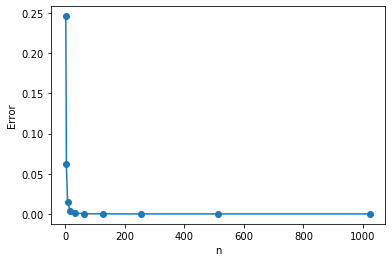

In [61]:
num_elements = 2**np.arange(1, 11)

Δtrap = []
for n in num_elements:
    trap = compute_trap(n)
    error_trap = abs(trap - exact)/exact
    Δtrap.append(error_trap)
    
plt.plot(num_elements, Δtrap, 'o-')
plt.xlabel('n')
plt.ylabel('Error')

#### 12. Finally compare the results obtained in 11 for the rectangle rule and in 12 for the trapezoid rule on a single graph. Draw a brief conclusion to the results obtained graphically.

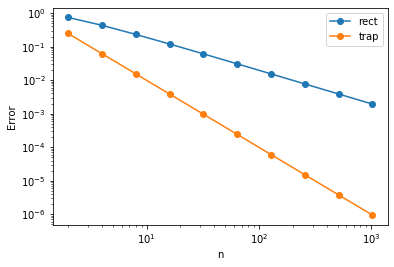

In [66]:
plt.loglog(num_elements, Δrect, 'o-', label='rect')
plt.loglog(num_elements, Δtrap, 'o-', label='trap')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()

Comment: The trapezoidal rule converges much faster than the rectangle rule to the exact solution.

## Taylor Series

Idea: approximate a smooth function with a polynomial.

We *expand* $f(x)$ around the point $x=a$.

$$\begin{align}
f(x) &= f(a) +  f'(a)(x-a) +  f''(a)\frac{(x-a)^2}{2} +  f'''(a)\frac{(x-a)^3}{6}  + \cdots \\
&= \sum_0^\infty f^{(n)}(a)\frac{(x-a)^n}{n!} 
\end{align}$$

Each term in the series makes a polynomial a better approximation to $f(x)$.


$$
\begin{align}
T_0 (x) &= f(a)  & \mbox{(a constant)} \\
T_1(x) &= f(a) + f'(a)(x-a) & \mbox{(a line)} \\
T_2(x) &= f(a) + f'(a)(x-a) + f''(a)\frac{(x-a)^2}{2} &   \mbox{(a parabola)}
\end{align}$$

The series is designed so that if you take the $n^\mbox{th}$ derivative of the series at $x=a$, you get precisely $f^{(n)}(a)$.

- - -
### Example

Expand $f(x) = \sin x$ around $x=0$ to the 3$^\text{rd}$ order.

(An expansion around $x=0$ is called a Maclaurin series.)

$$ \begin{align}
f(x) &= \sin(x) \\
f(0) &= 0 \\
f'(0) &=  \cos(x) \big|_{x=0} = 1 \\
f''(0) &=  -\sin(x) \big|_{x=0} = 0 \\
f'''(0) &=  -\cos(x) \big|_{x=0} = -1
\end{align} $$

So the  3$^\text{rd}$ order Taylor series is

$$
\begin{align}
f(x) &\approx f(0) + f'(0) x + f''(0) \frac{x^2}{2} + f'''(0) \frac{x^3}{6} \\
\sin(x) &\approx x - \frac{x^3}{6} \quad\quad \mbox{(next term would be $\sim x^5$)}\\
\end{align}$$


or we can write

$$ \sin(x) = x - \frac{x^3}{6} + \mathcal{O}(x^5) $$

The notation $\mathcal{O}(x^5)$ means that of all the other terms we are missing, the leading one varies as $x^5$.

*i.e.* for $x$ small $ x^5 \gg x^7 \gg x^9$ etc.
- - -

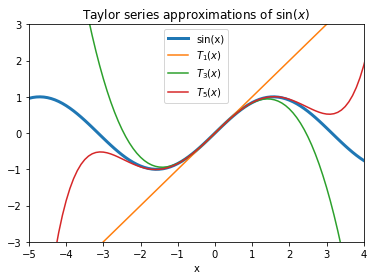

In [67]:
x = np.arange(-5, 5, 0.1)
plt.plot(x, np.sin(x), linewidth=3, label='sin(x)')
plt.plot(x, x, label='$T_1(x)$')
plt.plot(x, x - x**3/6, label = '$T_3(x)$')
plt.plot(x, x - x**3/6+ x**5/120, label = '$T_5(x)$')
plt.ylim(-3, 3)
plt.xlim(-5,4)
plt.legend()
plt.xlabel('x')
plt.title('Taylor series approximations of $\sin(x)$')
plt.show()

- - -

### Deriving a forward difference

We can rewrite the Taylor series as 

$$f(x+h) = f(x) + f'(x) h + f''(x) \frac{h^2}{2} + f'''(x) \frac{h^3}{6} + \cdots $$

where we are expanding around $x = a = x$ so that $((x+h) - a) = (x+h-x) = h$.
 
That is, we are expanding around $x$ and $h$ is a small step away from $x$.

Solve the Taylor series for $f'(x)$

$$\begin{align}
f'(x) &= \frac{f(x+h) - f(x)}{h} - \frac{f''(x)}{2}h - \frac{f'''(x)}{6} h^2 \\
&= \frac{f(x+h) - f(x)}{h} + \mathcal{O}(h)
\end{align}$$

The first term

$$\frac{f(x+h) - f(x)}{h}$$

is the *forward difference approximation for the first derivative* and

$$\mathcal{O}(h)$$

means the error is of order $h$ (size of error terms decreases linearly with $h$).

### Deriving a backwards difference

We could also rewrite the Taylor series as 

$$f(x-h) = f(x) - f'(x) h + f''(x) \frac{h^2}{2} - f'''(x) \frac{h^3}{6} + \cdots $$

( We replacing $h \rightarrow -h$ )


Solve the Taylor series for $f'(x)$

$$\begin{align}
f'(x) &= \frac{f(x) - f(x-h)}{h} - \frac{f''(x)}{2}h + \frac{f'''(x)}{6} h^2 \\
&= \frac{f(x) - f(x-h)}{h} + \mathcal{O}(h)
\end{align}$$

Now, the first term

$$\frac{f(x) - f(x-h)}{h}$$

is the *backwards difference approximation for the first derivative* and

$$\mathcal{O}(h)$$

means the error is of order $h$ (same order error as forward difference).

### Deriving centred difference

Substracting the Taylor series for $f(x+h)$ from the Taylor series for $f(x-h)$ gives

$$ f(x+h) - f(x-h) = 2 f'(x) h + 2 f'''(x) \frac{h^3}{6} + \cdots$$

Solving for $f'(x)$ gives

$$ f'(x) = \frac{ f(x+h) - f(x-h)}{2 h} + \mathcal{O}(h^2) $$

which shows that the *centred difference approximation for the first derivative* has error term on the order of $h^2$ (the size of the error term decreases quadratically with $h$).

### Deriving a centred difference for a second derivative

Adding the Taylor series for $f(x+h)$ to the Taylor series for $f(x-h)$ gives

$$ f(x+h) + f(x-h) = 2 f(x) + 2 f''(x) \frac{h^2}{2} +  2 f^{(4)}(x) \frac{h^4}{4!}  \cdots$$

Solving for $f''(x)$ gives

$$ f''(x) = \frac{ f(x+h) - 2f(x) + f(x-h)}{h^2} + \mathcal{O}(h^2) $$

This is the *centred difference approximation for the **second** derivative*  of $f$. It has an error term of $\sim h^2$.

## Error examples 

In [68]:
print('x = π/4')
x = np.pi/4   # x = π/4

print('y = sin(x)')
y = lambda x: np.sin(x) # y = sin(x)

y0 = y(x) # y = sin(π/4)

print("y' = cos(x)")
y1 = np.cos(x) # y' = cos(x) = cos(π/4)

print("y'(π/4) = {:.8f}".format(y1))

x = π/4
y = sin(x)
y' = cos(x)
y'(π/4) = 0.70710678


##### Forward difference

$$ y'(x) \approx \frac{y(x+h) - y(x)}{h} $$

In [69]:
h = 0.1
y1_fd = ( y(x + h) - y(x) ) / h

print("Forward difference with h = {:.1}, y'(π/4) = {:.8f}".format(h, y1_fd))
print("Error is {0:.8f} = {0:.1e}".format(abs(y1 - y1_fd)))

Forward difference with h = 0.1, y'(π/4) = 0.67060297
Error is 0.03650381 = 3.7e-02


In [70]:
h = 0.01
y1_fd = ( y(x + h) - y(x) ) / h

print("Forward difference with h = {:.2}, y'(π/4) = {:.8f}".format(h, y1_fd))
print("Error is {0:.8f} = {0:.1e}".format(abs(y1 - y1_fd)))

Forward difference with h = 0.01, y'(π/4) = 0.70355949
Error is 0.00354729 = 3.5e-03


Decreasing $h$ by a factor of $10$ decreases error by a factor of $10$.
- - -

#### Centred difference

$$ y'(x) \approx \frac{y(x+h) - y(x-h)}{2 h} $$

In [72]:
h = 0.1
y1_cd = ( y(x + h) - y(x-h) ) / (2*h)

print("Centred difference with h = {:.1}, y'(π/4) = {:.8f}".format(h, y1_cd))
print("Error is {0:.8f} = {0:.1e}".format(abs(y1 - y1_cd)))

Centred difference with h = 0.1, y'(π/4) = 0.70592886
Error is 0.00117792 = 1.2e-03


In [73]:
h = 0.01
y1_cd = ( y(x + h) - y(x-h) ) / (2*h)

print("Centred difference with h = {:.2}, y'(π/4) = {:.8f}".format(h, y1_fd))
print("Error is {0:.8f} = {0:.1e}".format(abs(y1 - y1_cd)))

Centred difference with h = 0.01, y'(π/4) = 0.70355949
Error is 0.00001179 = 1.2e-05


Decreasing $h$ by a factor of $10$ decreases error by a factor of $10^2 = 100$.
- - -

These errors arise essentially from truncating the Tayler series at a certain order of the expansion (this is called *truncation error*).

There is another source of error, *roundoff error*, arising from the finite precision used to store numbers on the computer.

### Example of round-off error

$ \frac{d}{dx} \sin x \big |_{\pi/4} $ with forward difference:

In [74]:
h = 1e-7
y1_fd = ( y(x + h) - y(x) ) / h

print("Forward difference with h = {:.0e}, y'(π/4) = {:.8f}".format(h, y1_fd))
print("Error is {0:.1e}".format(abs(y1 - y1_fd)))

Forward difference with h = 1e-07, y'(π/4) = 0.70710675
Error is 3.6e-08


In [75]:
h = 1e-9
y1_fd = ( y(x + h) - y(x) ) / h

print("Forward difference with h = {:.0e}, y'(π/4) = {:.8f}".format(h, y1_fd))
print("Error is {0:.1e}".format(abs(y1 - y1_fd)))

Forward difference with h = 1e-09, y'(π/4) = 0.70710682
Error is 3.6e-08


Error remained the same even though $h$ got smaller by a factor of 100.

In [76]:
h = 1e-11
y1_fd = ( y(x + h) - y(x) ) / h

print("Forward difference with h = {:.0e}, y'(π/4) = {:.8f}".format(h, y1_fd))
print("Error is {0:.1e}".format(abs(y1 - y1_fd)))

Forward difference with h = 1e-11, y'(π/4) = 0.70711215
Error is 5.4e-06


Error increases even though $h$ got still smaller.
- - -

## Simpson's Rule for Integration

<a title="Popletibus This W3C-unspecified vector image was created with Inkscape. [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Simpsons_method_illustration.svg"><img width="256" alt="Simpsons method illustration" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Simpsons_method_illustration.svg/256px-Simpsons_method_illustration.svg.png"></a>

Idea: fit a parabola through three points
- work with consecutive triplets
- need an odd number of points

Consider 

$$ \int_{-1}^{1} f(x) dx $$

approximate  $ f(x) \approx \alpha x^2 + \beta x + \gamma $ (like a 2$^\text{nd}$ order Taylor series)

$$\begin{align}
\int_{-1}^{1} f(x) dx & = \int_{-1}^{1}\alpha x^2 + \beta x + \gamma  dx \\
&= \frac{2}{3} \alpha + 2 \gamma 
\end{align}$$


Now, 

$$\begin{align}
f(-1) &= \alpha - \beta + \gamma \\
f(0) &= \gamma  \quad\quad\quad\quad \rightarrow \gamma = f(0) \\
f(1) &= \alpha + \beta + \gamma
\end{align}$$

solve for $\alpha$

$$
\begin{align}
f(-1) + f(1) &= 2\alpha + 2\gamma \\
\alpha &= \frac{f(-1) + f(1)}{2} -f(0)
\end{align}
$$


so

$$\begin{align}
\int_{-1}^{1} f(x) dx & \approx \frac{2}{3} \alpha + 2 \gamma  \\
& = \frac{2}{3} \left( \frac{f_{-1} + f_{1}}{2} - f_0\right) + 2 f_0 \\
& = \frac{1}{3}f_{-1} + \frac{4 }{3}f_0 + \frac{1}{3}f_1
\end{align}$$

Approximating the intergal with three function calls with these weights is equivalent to approximating curve with a parabola.

This generalizes to

$$
\int_{x_i -h }^{x_i + h} f(x) dx \approx  \frac{h}{3}f_{i-1} + \frac{4h }{3}f_i + \frac{h}{3}f_{i+1}$$

where $f_i = f(x_i)$ and $f_{i\pm1} = f(x_{i\pm 1}) = f(x_i \pm h)$.

#### Example

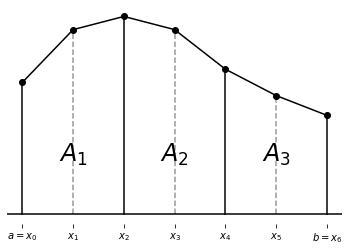

In [77]:
fig, ax = plt.subplots()
plt.axhline(0, color='k')
##plt.axis(False)
x = [0, 1, 2, 3, 4, 5, 6]
y = [2, 2.8, 3, 2.8, 2.2, 1.8, 1.5]
plt.plot(x, y, 'ko-')
for x0, y0 in zip(x, y):
    if x0 % 2 == 0:
        style = 'k-'
        alpha = 1
    else:
        style = 'k--'
        alpha = 0.4
    plt.plot([x0, x0], [0, y0], style, alpha=alpha)

ax.axes.get_yaxis().set_visible(False)
plt.xticks(x, 
           ['$a = x_0$','$x_1$', '$x_2$', '$x_3$', '$x_4$', '$x_5$', '$b=x_6$'])
plt.box(False)
plt.text(1, .8, '$A_1$', size=24, horizontalalignment='center')
plt.text(3, .8, '$A_2$', size=24, horizontalalignment='center')
plt.text(5, .8, '$A_3$', size=24, horizontalalignment='center')
plt.show()

7 points, $n = 6$ slabs, 3 areas.

$$\begin{align}
\int_a^b f(x) dx &=  A_1 \quad\quad + \quad\quad A_2 \quad\quad+\quad\quad A_3 \\
 &= \int_{x_1 - h}^{x_1+h} f(x) dx + \int_{x_3 - h}^{x_3+h} f(x) dx + \int_{x_5 - h}^{x_5+h} f(x) dx \\
\end{align}$$


$$\begin{align}
&= \left( \frac{h}{3}f_0 + \frac{4h }{3}f_1 + \frac{h}{3}f_2 \right) + 
\left( \frac{h}{3}f_2 + \frac{4h }{3}f_3 + \frac{h}{3}f_4 \right) + 
\left( \frac{h}{3}f_4 + \frac{4h }{3}f_5 + \frac{h}{3}f_6 \right) \\
&= \frac{h}{3} \left( f_0 + 4 f_1 + 2 f_2 + 4 f_3 + 2 f_4 + 4 f_5 + f_6\right)
\end{align}$$

In general, with $n+1$ points ($n$ even),

$$ \int_a^b f(x) dx = \frac{h}{3} \left( f_0 + 4 f_1 + 2 f_2 + \ldots + 2 f_{n-2} + 4 f_{n-1} + f_n\right) $$

Odd points multiplied by 4, even interior points multipled by 2.

$$ = \frac{h}{3} \left ( f_0 + 4 \sum_{i\;\text{odd}} f_i + 2 \sum_{i\;\text{even}} f_i + f_n \right) $$

There are $\frac{n}{2}$ odd points and $\frac{n}{2} - 1$ even interior points.

From *Wikipedia*: An animation showing how Simpson's rule approximation improves with more strips.
<a title="Mkwadee [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Simpsonsrule2.gif"><img width="512" alt="Simpsonsrule2" src="https://upload.wikimedia.org/wikipedia/commons/6/67/Simpsonsrule2.gif"></a>

## Runge-Kutta Methods

The goal is to solve

\begin{align}
\frac{dy}{dt} = f(y,t), \quad y(0) = y_0
\end{align}

### Review of Euler's method

We can approximate derivative with a **forward difference**

\begin{align}
 \frac{dy}{dt} &= \frac{y(t+\Delta t) - y(t)}{\Delta t} + \mathcal{O}(\Delta t) \\
 y(t+\Delta t) &= y(t) + \frac{dy}{dt}\Delta t + \mathcal{O}(\Delta t^2) 
\end{align}

since $\frac{dy}{dt} = f(y,t)$ we can write

$$  y(t+\Delta t) = y(t) + f(y,t) \Delta t + \mathcal{O}(\Delta t^2) $$

We say that Euler's method is accurate to *first-order* in $\Delta t$ since it is equivalent to the Taylor series up to first order in $\Delta t$.

### Midpoint scheme or Second-Order Runge-Kutta Method

Start with a **central difference** representation for a derivative

\begin{align}
 \frac{dy}{dt} &= \frac{y(t+\Delta t) - y(t-\Delta t)}{2 \Delta t} + O(\Delta t^2) \\
 y(t+\Delta t) &= y(t-\Delta t) + 2 \frac{dy}{dt} \Delta t + O(\Delta t^3) \\
  &= y(t - \Delta t) + 2 f(y(t), t)\Delta t +O(\Delta t^3)
\end{align}

$f(y(t), t)$ is evaluated at the midpoint in time between $t - \Delta t$ and $t+\Delta t$. 

We can rewrite this as

$$ y(t+\Delta t) = y(t) + f\left(y(t + \Delta t /2), t + \Delta t/2\right)\Delta t +O(\Delta t^3)$$

i.e. $\Delta t \rightarrow \Delta t / 2$, then we can shift $t \rightarrow t + \Delta t / 2$

So, if we can estimate 

$$ f\left(y(t + \Delta t /2), t + \Delta t/2\right) $$

we can gain an order in our truncation error. To do this we need to estimate $y(t+\Delta/2)$.

Trick: use an Euler half-step

$$
y ( t + \Delta t / 2) = y(t) + f(y(t), t)  \frac{\Delta t}{2} + \mathcal{O}(\Delta t^2)
$$


We can show (through a Taylor expansion) that this leads to a final estimate of $y(t + \Delta t)$ that is accurate to *second-order* in $\Delta t$. For the simpler case where $ \frac{dy}{dt} = f(y)$,

$$\begin{align}
f\left(y(t+\frac{\Delta t}{2})\right) &= f\left(y(t) + \frac{\Delta t}{2} y'(t) + \mathcal{O}(\Delta t^2)\right)\\
&= f(y(t)) + \frac{df(y)}{dy} \left( \frac{\Delta t}{2} y'(t) + \mathcal{O}(\Delta t^2)  \right) + \mathcal{O}(\Delta y^2) \\
&= f(y) + \frac{\Delta t}{2} y'(t) \frac{df(y)}{dy} + \mathcal{O}(\Delta t^2) \\
&= f(y) + \frac{\Delta t}{2} \frac{dy}{dt}  \frac{df}{dt} \frac{dt}{dy}+ \mathcal{O}(\Delta t^2) \\
&= f(y) + \frac{\Delta t}{2}   \frac{df}{dt}+ \mathcal{O}(\Delta t^2) \\
\end{align}
$$

So the mid-point method becomes

$$\begin{align}
y(t +\Delta t) &= y(t) + \Delta t f\left( y(t + \frac{\Delta t}{t} )\right) + \mathcal{O}(\Delta t^3) \\
&= y(t) + \Delta t f(y) +  \frac{\Delta t^2}{2}   \frac{df}{dt}+ \mathcal{O}(\Delta t^3) \\
&= y(t) + \Delta t y'(t) +  \frac{\Delta t^2}{2}  y''(t) + \mathcal{O}(\Delta t^3)
\end{align}$$

with this procedure, we indeed recover the Taylor series up to second order in $\Delta t$.

### Midpoint Algorithm

1\. Estimate slope at $t$

$$ s_1 = f(y(t), t) $$

2\. Use $s_1$ to estimate the midpoint between $t$ and $t + \Delta t$

\begin{align}
y^* &= y ( t + \Delta t) \\
       &= y(t) + \frac{\Delta t}{2} s_1
\end{align}
 	

3\. Use $y^*$ to get the the slope at the midpoint

$$ s_2 = f( y^*, t +  \frac{\Delta t}{2} ) $$

4\. Use $s_2$ to estimate $y(t + \Delta t)$

$$ y(t + \Delta t) = y(t) + \Delta t s_2 $$

### Midpoint Algorithm

\begin{align}
s_1 &= f(y_i, t_i) \\
y^* &= y_i + \Delta t / 2 s_1 \\
s_2 &= f(y^*, t_i + \Delta t /2) \\
y_{i+1} &= y_i + \Delta t s_2
\end{align}

Although the algorithm takes two steps, there is an order gain in accuracy. The error of the scheme is of order  $\Delta t^2$. This means that decreasing the timestep  $\Delta t$ by a factor of  2 decreases the error by a factor of 4. 

It also means that compared to the Euler scheme and for the same time step used the accuracy of the scheme is better.

This algorihm is sometimes calleed the *Midpoint Algorithm*, the *Euler-Richardson Algorithm*, or the *Second-Order Runge-Kutta Method*.

### Fourth-Order Runge-Kutta Method

A very common scheme is the classical Fourth-Order Runge-Kutta formula.

$$
\begin{align}
    s_1 &= f(y_i, t_i,) \\
    y_{1/2} &= y_i + s_1 \Delta t /2 \\ 
    s_2 &= f(y_{1/2}, t + \Delta t / 2) \\
    y_{1/2}^* &= y_i + s_2 \Delta t / 2  \\
    s_3 &= f(y_{1/2}^*, t + \Delta t / 2) \\
    y^* &= y_i + s_3 \Delta t  \\
    s_4 &= f(y^*, t + \Delta t) \\
    y_{i+1} &= y_i  +  \frac{\Delta t}{6} (s_1+2 s_2+2s_3+s_4)\\
\end{align}
$$

The error of the scheme is of order  $\Delta t^4$. This means that decreasing the timestep  $\Delta t$ by a factor of 2 decreases the error by a factor of 16. It also means that compared to the Euler or midpoint schemes the accuracy is typically much better.

## Examples

### Example 1

Solve numerically the following ODE

$$ \frac{dy}{dt} = - y $$

with initial condition

$$ y(0)=1$$

using the Euler and midpoint and RK4 methods and compare graphically the numerical solutions to the exact solution. Take 
$\Delta t$=0.5 and carry out the simulation up to $t=4$.

In [ ]:
tmax = 4
dt = 0.5

N = round(tmax/dt)
t = np.arange(0, tmax, dt)

# Exact solution
y_exact = 1 * np.exp(-t)

# Euler's method
y = np.zeros(N)
y[0] = 1
for i in range(N-1):
    s1 = -y[i]
    y[i+1]  = y[i] + s1*dt
y_euler = y

# Midpoint method
y = np.zeros(N)
y[0] = 1
for i in range(N-1):
    s1 = -y[i]
    ytmp = y[i] + dt/2 * s1
    s2 = -ytmp
    y[i+1]  = y[i] + s2*dt
y_midpoint = y

# RK4 method
y = np.zeros(N)
y[0] = 1
for i in range(N-1):
    s1 = -y[i]
    y1 = y[i] + s1 * dt/2
    s2 = -y1
    y2 = y[i] + s2 * dt/2
    s3 = -y2
    y3 = y[i] + s3 * dt
    s4 = -y3
    y[i+1] = y[i] + (s1 + 2*s2 + 2*s3 + s4)/6*dt
y_RK4 = y

### Compare the solutions

In [ ]:
fig, axes = plt.subplots(figsize=(7,7))
plt.plot(t, y_exact, 'k-',  label='Exact')
plt.plot(t, y_euler, 'o:',  label='Euler')
plt.plot(t, y_midpoint, 'o:',  label='Midpoint')
plt.plot(t, y_RK4, 'o:',  label='RK4')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()

### Example 2

Solve numerically the following ODE

$$ \frac{dy}{dt} = -2 y +3 e^{-4t} $$

 with initial condition
 
$$ y(0)=1$$ 

 using the Euler and midpoint methods, and compare graphically the numerical solutions to the exact solution. Take 
$\Delta t =0.2$ and carry out the simulation up to  $t=3$.

In [ ]:
tmax = 3
dt = 0.2

N = round(tmax/dt)
t = np.arange(0, tmax, dt)

# Exact solution
y_exact = 1/2* np.exp(-4*t)*(5*np.exp(2*t)-3)

# define the right hand side
def f(y, t):
    return -2*y+3*np.exp(-4*t)

# Euler's method
y = np.zeros(N)
y[0] = 1
for i in range(N-1):
    s1 = f(y[i], t[i])
    y[i+1]  = y[i] + s1*dt
y_euler = y

# Midpoint scheme
y = np.zeros(N)
y[0] = 1
for i in range(N-1):
    s1 = f(y[i], t[i])
    ytmp = y[i] + dt/2 * s1
    s2 = f(ytmp, t[i])
    y[i+1]  = y[i] + s2*dt
y_midpoint = y

# RK4 method
y = np.zeros(N)
y[0] = 1
for i in range(N-1):
    s1 = f(y[i], t[i])
    y1 = y[i] + s1 * dt/2
    s2 = f(y1, t[i] + dt/2)
    y2 = y[i] + s2 * dt/2
    s3 = f(y2, t[i] + dt/2)
    y3 = y[i] + s3 * dt
    s4 = f(y3, t[i] + dt)
    y[i+1] = y[i] + (s1 + 2*s2 + 2*s3 + s4)/6*dt
y_RK4 = y

In [ ]:
fig, axes = plt.subplots(figsize=(7,7))
plt.plot(t, y_exact, 'k-',  label='Exact')
plt.plot(t, y_euler, 'o:',  label='Euler')
plt.plot(t, y_midpoint, 'o:',  label='Midpoint')
plt.plot(t, y_RK4, 'o:',  label='RK4')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()

It is clear that for the same time step, the fourth-order Runge-Kutta method is much more accurate.